In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3><b>Import the libraries and dataset<b></h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
file_path = '/content/drive/My Drive/Personal Data Analytics Project/Heart Disease Analysis/heart.csv'
df = pd.read_csv(file_path)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<h3><b>Check for duplicate rows and delete them</b></h3>

In [77]:
# Check for duplicates
duplicates = df.duplicated()
duplicate_rows = df[df.duplicated()]

# Get a list of duplicate row indices before modifying the DataFrame
duplicate_indices = df[duplicates].index.tolist()

# Drop duplicate rows using the list of indices
df.drop(index=duplicate_indices, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

print("Duplicate Rows that were dropped:\n", duplicate_rows)

Duplicate Rows that were dropped:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15      

<h3><b>Extract the correlation matrix to identify potential correlations and trends among variables</b></h3>

In [78]:
# Extract Correlation between variables
correlation_matrix = df.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.03

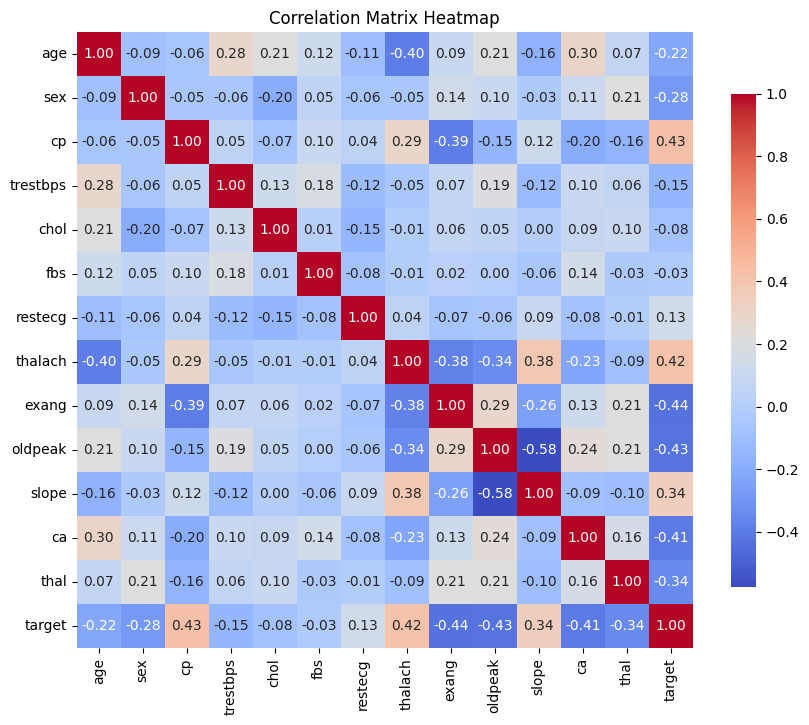

In [79]:
# Visualise using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

<h3><b>Age Distribution</b></h3>

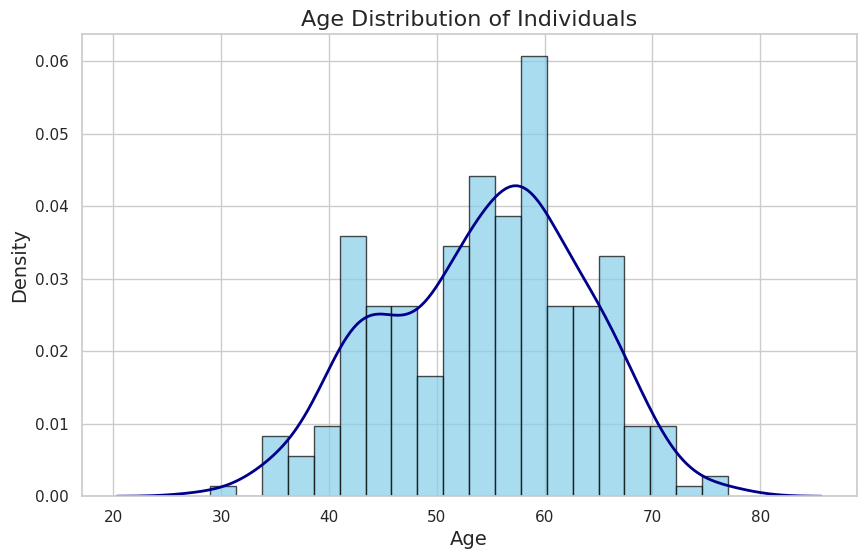

In [90]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

df['age'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)

# Add a KDE overlay
sns.kdeplot(df['age'], color='darkblue', linewidth=2)

plt.title('Age Distribution of Individuals', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age', data=df, palette='Set2')
plt.title('Count of Individuals with and without Heart Disease', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Add percentage annotations
total = len(df)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()/total:.1%}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

<h3><b>Identify the number of individuals with and without heart disease</b></h3>

In [80]:
# "target" field in the dataframe depicts whether the individual has a heart disease or not.
# 1 -> Heart Disease
# 0 -> No Heart Disease
df['target'].value_counts()


,count
target,
1,164
0,138


<ipython-input-81-320947c49659>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


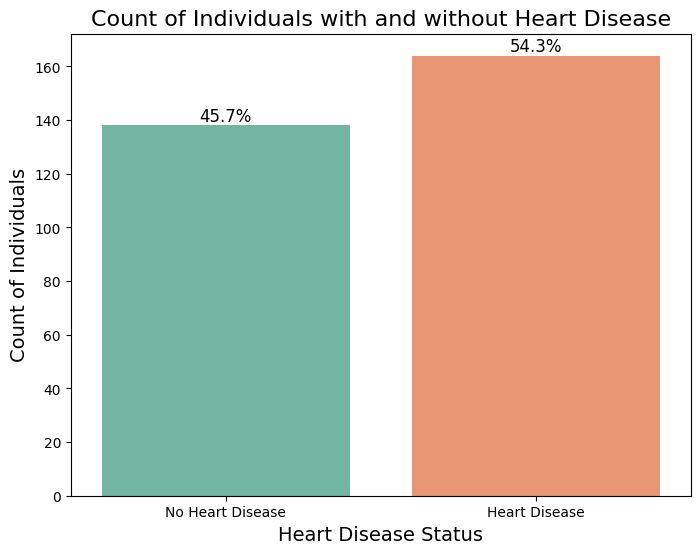

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Count of Individuals with and without Heart Disease', fontsize=16)
plt.xlabel('Heart Disease Status', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Add percentage annotations
total = len(df)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()/total:.1%}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

<h3><b>Extract Gender Distribution</b></h3>

In [82]:
# "target" field in the dataframe depicts whether the individual has a heart disease or not.
# 1 -> Male
# 0 -> Female
df['sex'].value_counts()

,count
sex,
1,206
0,96


<ipython-input-83-d2367ff99dfe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


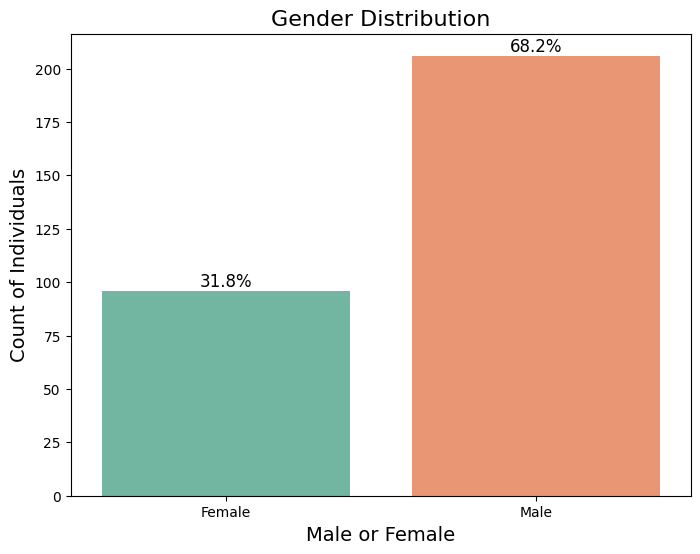

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='Set2')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Male or Female', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Add percentage annotations
total = len(df)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()/total:.1%}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

<h3><b>Gender distribution according to the "target" variable</b></h3>
<h5> Here we find out how many males and females have a heart condition

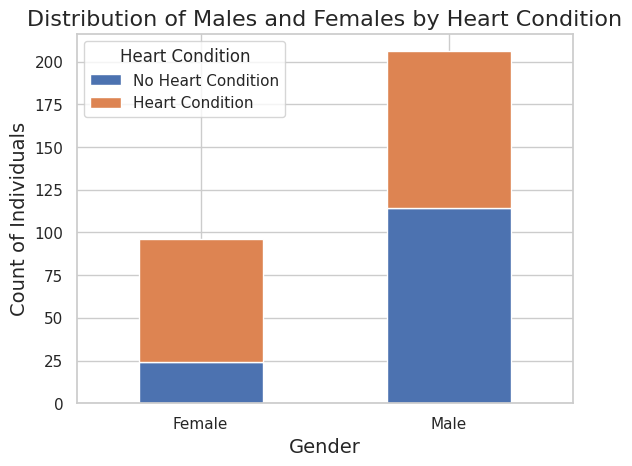

In [106]:
# Create a DataFrame to count occurrences
counts_sex_target = df.groupby(['sex', 'target']).size().unstack(fill_value=0)

# Plot the stacked bar plot
counts_sex_target.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Distribution of Males and Females by Heart Condition', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)

# Show the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'])
plt.show()


<h3><b>Identify Various Chest Pain Types</b></h2>

In [91]:
df['cp'].value_counts()

,count
cp,
0,143
2,86
1,50
3,23


<ipython-input-94-51017c764e79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='Set2')


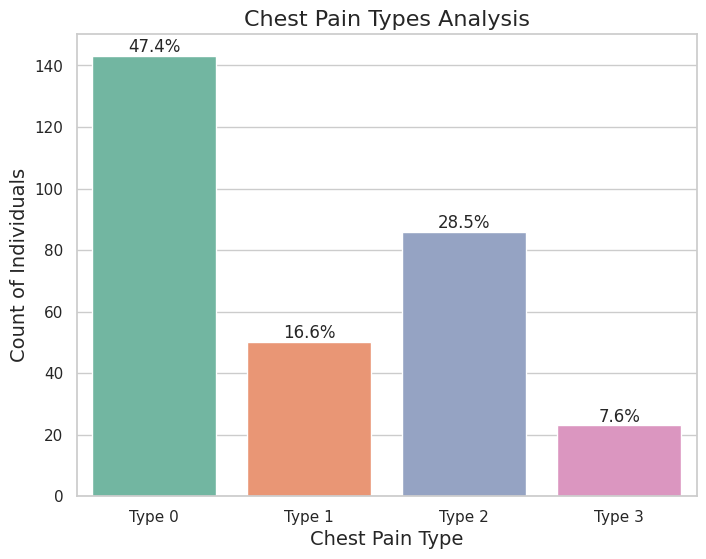

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df, palette='Set2')
plt.title('Chest Pain Types Analysis', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)

# Add percentage annotations
total = len(df)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()/total:.1%}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# Show the plot
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
plt.show()

<h3><b>Chest Pain Distribution according to "target" variable</b></h3>

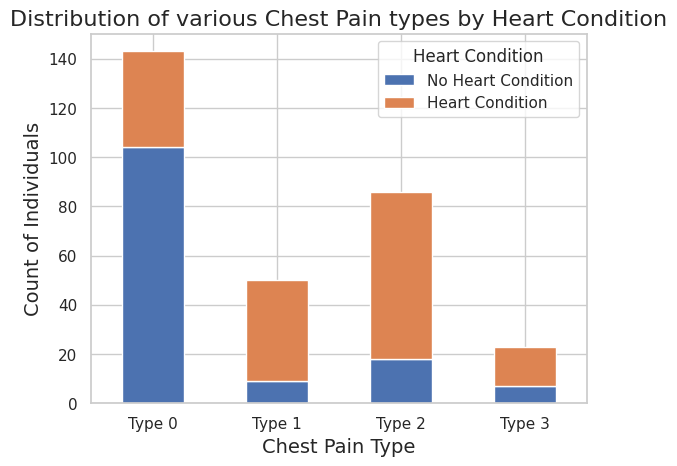

In [125]:
# Create a DataFrame to count occurrences
counts_cp_target = df.groupby(['cp', 'target']).size().unstack(fill_value=0)

# Plot the stacked bar plot
counts_cp_target.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Distribution of various Chest Pain types by Heart Condition', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'], rotation=0)

# Show the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'])
plt.show()

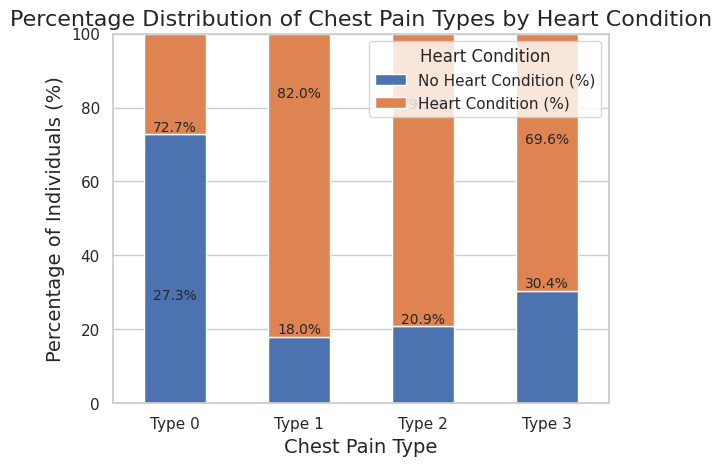

In [124]:
# Create a DataFrame to count occurrences
counts_cp_target = df.groupby(['cp', 'target']).size().unstack(fill_value=0)

# Calculate percentages
percentages_cp_target = counts_cp_target.div(counts_cp_target.sum(axis=1), axis=0) * 100

# Plot the stacked bar plot of percentages
ax = percentages_cp_target.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Percentage Distribution of Chest Pain Types by Heart Condition', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Percentage of Individuals (%)', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'], rotation=0)

# Show the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition (%)', 'Heart Condition (%)'])
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage

# Add percentage labels on the bars
for p in ax.patches:
    # Get the height and width of each bar
    height = p.get_height()
    width = p.get_width()
    # Calculate the x position to center the text on the bar
    x = p.get_x() + width / 2
    # Add the percentage label at the center of the bar
    if height > 0:  # Only add label if the height is greater than 0
        ax.annotate(f'{height:.1f}%', (x, height), ha='center', va='bottom', fontsize=10)

plt.show()


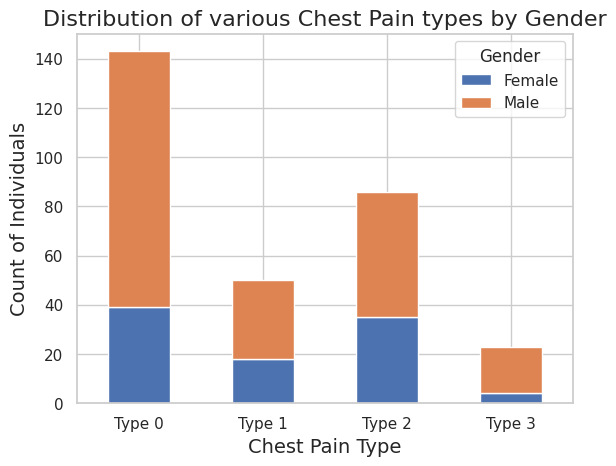

In [123]:
counts_cp_sex = df.groupby(['cp', 'sex']).size().unstack(fill_value=0)
counts_cp_sex.plot(kind='bar', stacked=True)
plt.title('Distribution of various Chest Pain types by Gender', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'], rotation=0)

# Show the plot
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

<h3><b>Fasting Blood Sugar Levels based on Heart Condition</b></h3>

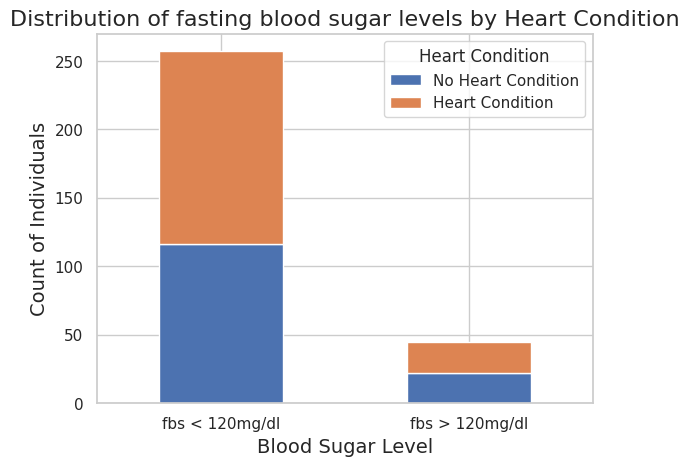

In [132]:
# Create a DataFrame to count occurrences
counts_fbs_target = df.groupby(['fbs', 'target']).size().unstack(fill_value=0)
counts_fbs_target.plot(kind='bar', stacked=True)
plt.title('Distribution of fasting blood sugar levels by Heart Condition', fontsize=16)
plt.xlabel('Blood Sugar Level', fontsize=14)
plt.ylabel('Count of Individuals', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['fbs < 120mg/dl', 'fbs > 120mg/dl'], rotation=0)

# Show the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'])
plt.show()


<h3><b>Resting Blood Pressure Distribution</b></h3>

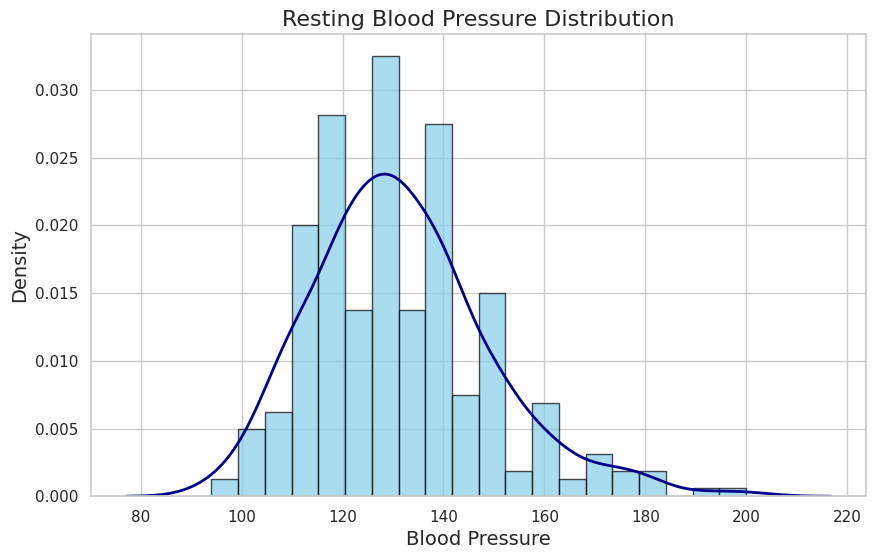

In [142]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

df['trestbps'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)

# Add a KDE overlay
sns.kdeplot(df['trestbps'], color='darkblue', linewidth=2)

plt.title('Resting Blood Pressure Distribution', fontsize=16)
plt.xlabel('Blood Pressure', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

<h3><b>Resting Blood Pressure Comparision by Gender</b></h3>

<ipython-input-145-4d755d32afd1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='trestbps', data=df, palette="Set2")


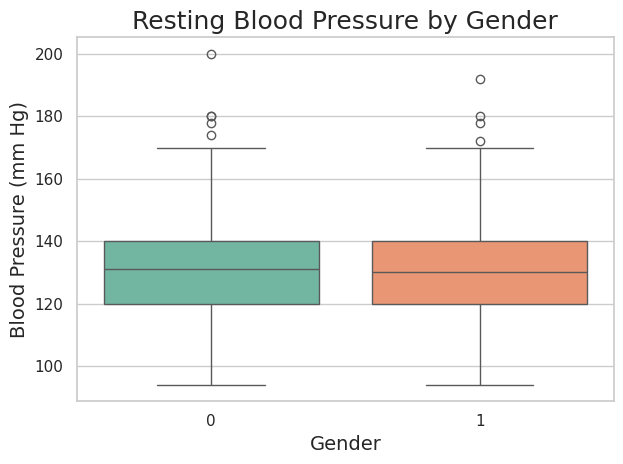

In [145]:
sns.boxplot(x='sex', y='trestbps', data=df, palette="Set2")
plt.title('Resting Blood Pressure by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Blood Pressure (mm Hg)', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


<h3><b>Serum Cholesterol Distribution</b></h3>

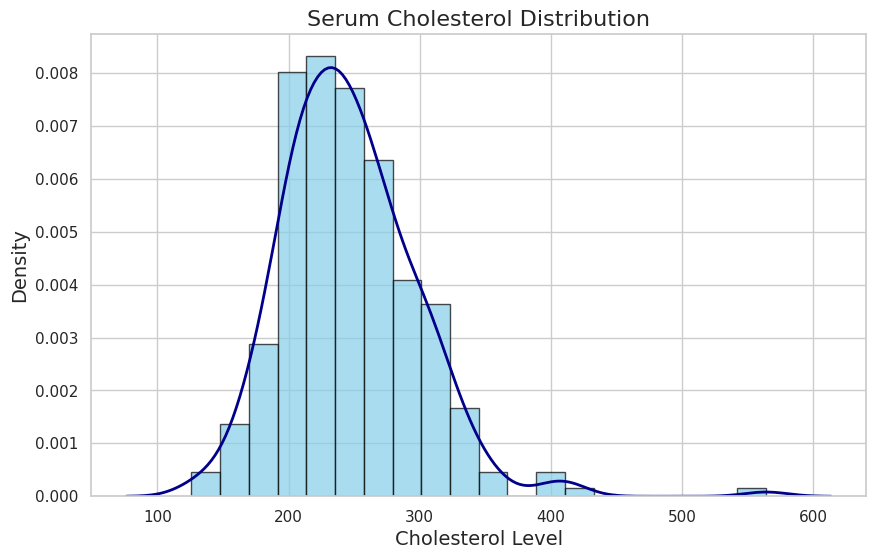

In [141]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

df['chol'].plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)

# Add a KDE overlay
sns.kdeplot(df['chol'], color='darkblue', linewidth=2)

plt.title('Serum Cholesterol Distribution', fontsize=16)
plt.xlabel('Cholesterol Level', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

<h3><b>Cholesterol Distribution by Age and Sex</b></h3>

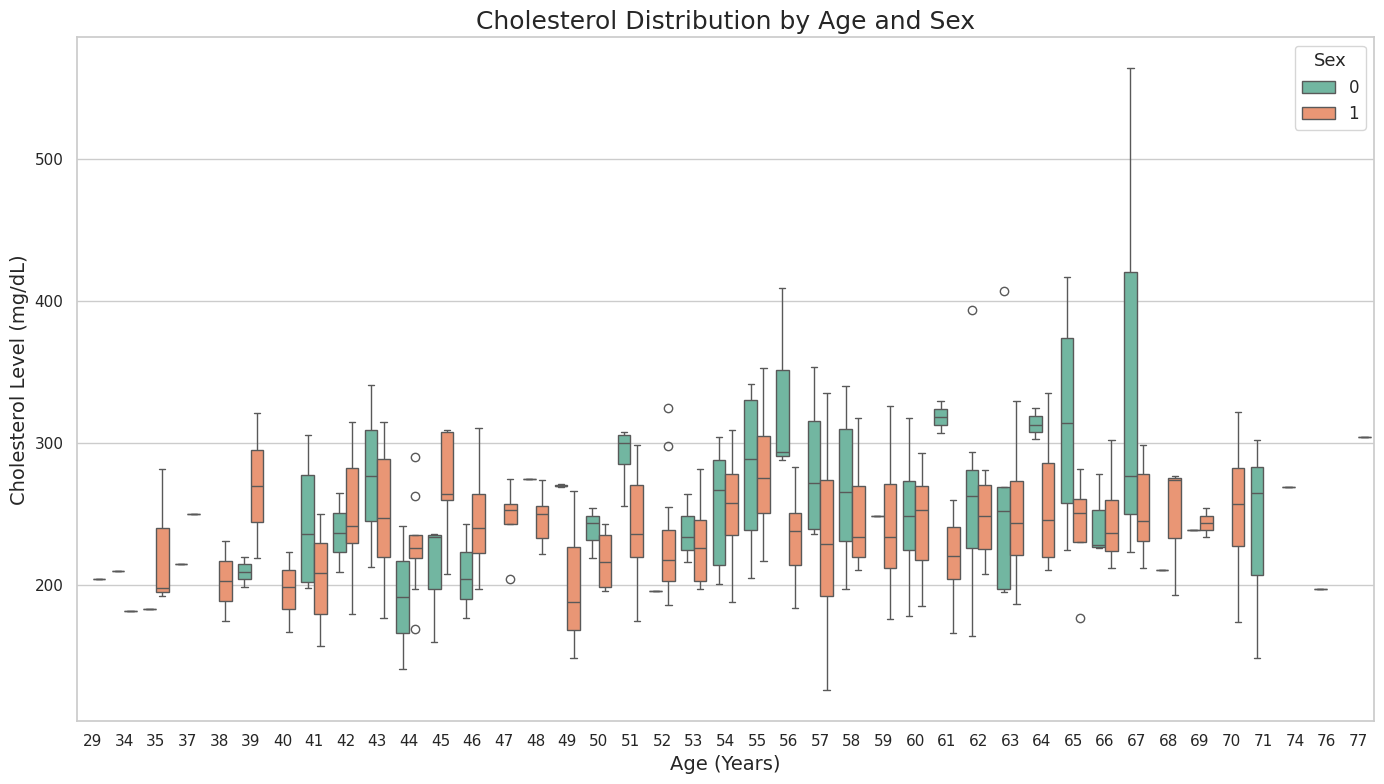

In [100]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='age', y='chol', hue='sex', data=df, palette="Set2", dodge=True)
plt.title('Cholesterol Distribution by Age and Sex', fontsize=18)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Cholesterol Level (mg/dL)', fontsize=14)
plt.legend(title='Sex', title_fontsize='13', fontsize='12')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()
